# An Example of a Monetary OLG Model with A Government Sector

Here we discuss an example of our OLG model with government seigniorage revenue as described in our <a href="olg_model.html">simple OLG model of money</a> with constant population of size 1.  Recall that an equilibrium is a real allocation $(c_{1,t},c_{2,t+1})$ and a sequence of prices $p_t$ and money supplies $M_t$ for a given level of fiscal policy $g$.  We assume that the only source of government revenue is newly printed money so that the government budget constraint is

$$
g = \nu_t(M_t-M_{t-1})
$$

where $g_t \equiv G_t/N_t$ is government spending per person (trivially because we assume the population is of size 1).  We take fiscal policy $g$ as exogenous and the path of money supply $M_t$ as responding to the revenue needs of the government.  In our <a href="olg_model.html">simple OLG model of money</a> we restricted our attention to a constant money supply growth rate $z$, so that the government budget constraint was $g=(1-1/z)\nu_t M_t$.  In this case, if we take $g$ as exogenous and fixed, only the stationary equilibrium is possible since market clearing requires  $g=(1-1/z)q_t$ so that we must have $q_t=q$.  If we do not restrict the path of money supply, then it becomes an endogenous variable which must satisfy the government budget constraint.  In particular, we can re-write the above government budget constraint using market clearing $m_t=M_t$ to say

$$
g = q_{t+1}-\frac{q_t}{\pi_{t+1}}
$$
where $\pi_{t+1} \equiv p_{t+1}/p_t=\nu_{t}/\nu_{t+1}$ is the gross inflation rate. 

We continue to assume CRRA utility so that real money demand is given by

$$
q_t = \frac{y}{1+\pi_{t+1}^{\frac{1-\eta}{\eta}}}, \quad \eta<1
$$

First, we look for the stationary equilibrium with $\pi_{t+1}=\pi$ and $q_{t}=q_{t+1}=q$.  The government budget constraint and real money demand function are then

$$
\begin{align*}
g &= q\left(1-\frac{1}{\pi}\right) \\
q &= \frac{y}{1+\pi^{\frac{1-\eta}{\eta}}},
\end{align*}
$$

Substituting out $q$ from the money demand function into the government budget constraint obtains

$$
g = \frac{y}{1+\pi^{\frac{1-\eta}{\eta}}}\left(\frac{\pi-1}{\pi}\right)
$$

The right hand side is the steady state amount of seigniorage revenue the government creates by inducing inflation $\pi$.  Notice that seigniorage revenue is only positive when $\pi>1$, simply reminding us that inflation is a necessary by-product of printing money.  Notice also that as $\pi \rightarrow \infty$ the amount amount of seigniorage revenue goes to zero.  This reflects the fact that as inflation becomes arbitrarily large agents real money demand vanishes, resulting in zero value for fiat currency.  Of course we also have that government revenue is zero when $\pi=1$.  Taken together, this implies that seigniorage as a function of $\pi$ is hump-shaped: a small increase in inflation raises revenues at first, but beyond the peak further inflation reduces real balances enough that revenues fall.  

Inflation reduces the real value people want to hold in currency; a higher $\pi$ both (i) raises nominal revenue per unit of money printed (because the government prints nominal money and prices are higher), but (ii) reduces the real demand for money so that the tax base falls. At low inflation increases in $\pi$ raise revenue (region where seigniorage rises). Past the peak, increases in $\pi$ shrink the real money base so much that revenue falls (region where seigniorage declines). If the government is constrained to a particular $g$, then the hump-shaped seigniorage function can intersect $g$ twice.  There are therefore two steady states: a "low-inflation, high-money" steady state, and a "high-inflation, low-money" steady state.  Stability differs across branches where one root will typically be locally stable, the other unstable.

Below we compute and plot the two steady state values of inflation and the inflation rate which maximizes seigniorage revenue.  We choose a values $y=1,\eta=0.5$ and $g=0.15$.  The low-inflation steady state has a value of $\pi=1.667$ and the high inflation steady state has $\pi_h=4$.  The inflation rate which maximizes seigniorage revenue is $\pi_{max}=2.414$.  Note that maximizing seigniorage revenue is not the same as optimal policy.  Optimal policy maximizes consumer's welfare, which may or may not be enhanced by government spending.  Additionally, even if public consumption entered agents utility function, we already saw that introducing inflation distorts agents consumption/savings decision resulting in a sub-optimal allocation.

We also plot real money demand at different inflation rates to provide more insights regarding why the seigniorage curve is hump shaped.  For low inflation levels real money demand is very high; therefore, increasing the growth rate of money generates real revenue for the government because each bill is highly valued since money demand is high.  As inflation increases, however, real money demand monotonically falls.  Eventually the money demand falls far enough so that bills are losing value fasting than the government can print them resulting in declining seigniorage revenue.

<>:142: SyntaxWarning: invalid escape sequence '\p'
<>:142: SyntaxWarning: invalid escape sequence '\p'
C:\Users\XPS\AppData\Local\Temp\ipykernel_47144\956393306.py:142: SyntaxWarning: invalid escape sequence '\p'
  label="Steady-state solutions to $S(\pi)=g$")


Model parameters:
  y = 1.0, eta = 0.5, g = 0.15

Seigniorage maximum (grid-refined): pi_max = 2.414265, S(pi_max) = 0.171573
Root 1: pi = 1.666682,  S(pi) = 0.150001, q(pi) = 0.374998
Root 2: pi = 4.000000,  S(pi) = 0.150000, q(pi) = 0.200000


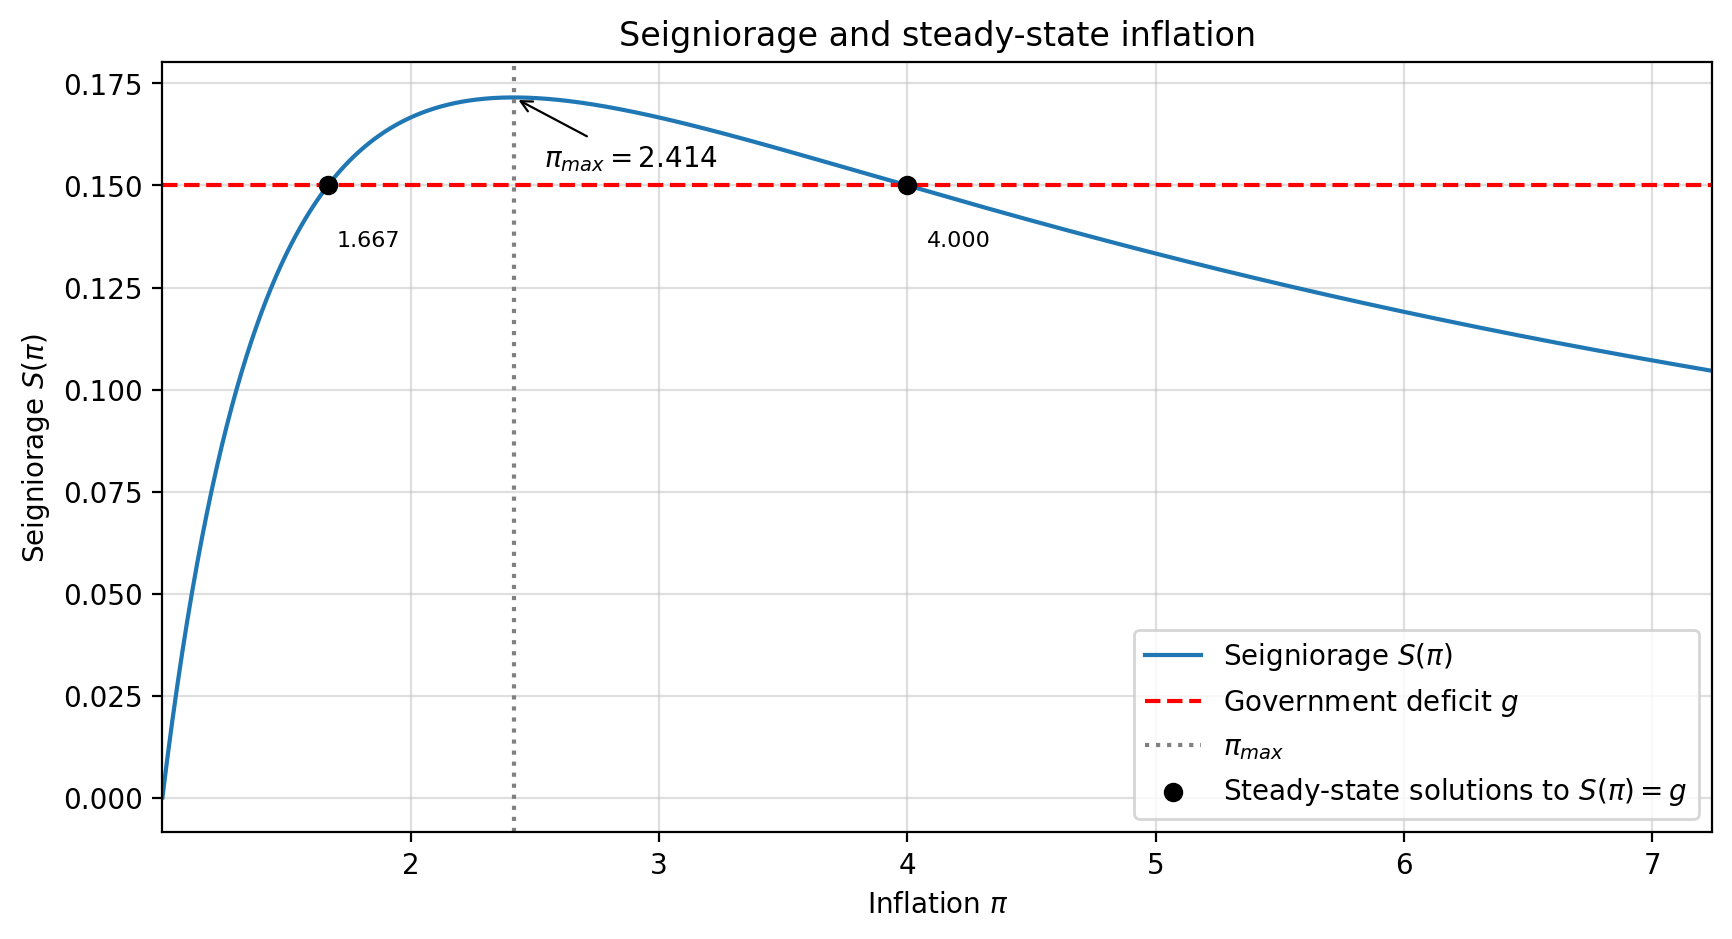

In [1]:
# Seigniorage analysis
import numpy as np
import matplotlib.pyplot as plt
from collections import namedtuple

plt.rcParams['figure.dpi'] = 200

# -------------------------
# Parameters container
# -------------------------
CRRAModel = namedtuple("CRRAModel", ["y", "eta", "g", "pi_min", "pi_max", "grid_N"])

def create_model(y=1.0, eta=0.5, g=0.15, pi_min=1.0001, pi_max=50.0, grid_N=20000):
    """
    Create model parameters.
      y     : real income (scale for money demand)
      eta   : CRRA/habit parameter in your formulation (eta < 1)
      g     : government spending financed by seigniorage (real units)
      pi_min: lower bound for inflation grid (must be > 1 for positive seigniorage)
      pi_max: upper bound for inflation grid to search over
      grid_N: number of grid points for pi
    """
    if not (eta < 1):
        raise ValueError("Model requires eta < 1 (per your specification).")
    return CRRAModel(y=y, eta=eta, g=g, pi_min=pi_min, pi_max=pi_max, grid_N=grid_N)


# -------------------------
# Model functions
# -------------------------
def q_of_pi(pi, model):
    """Real money demand q(pi) = y / (1 + pi^{(1-eta)/eta}). Works with array pi."""
    exponent = (1.0 - model.eta) / model.eta
    return model.y / (1.0 + np.power(pi, exponent))


def seign_of_pi(pi, model):
    """
    Seigniorage as function of inflation pi:
      S(pi) = q(pi) * (1 - 1/pi)
    Works elementwise for numpy arrays.
    """
    q = q_of_pi(pi, model)
    return q * (1.0 - 1.0 / pi)


def find_roots_by_grid(pi_grid, f_grid, target):
    """
    Find approximate roots of f(pi) = target using sign changes on the grid.
    Returns list of roots obtained by linear interpolation between grid points.
    """
    diff = f_grid - target
    sign_change = diff[:-1] * diff[1:] <= 0  # allows touching zero or sign change
    idx = np.where(sign_change)[0]
    roots = []
    for i in idx:
        x0, x1 = pi_grid[i], pi_grid[i + 1]
        y0, y1 = diff[i], diff[i + 1]
        if np.isclose(y0, y1):
            # avoid division by zero; take midpoint
            root = 0.5 * (x0 + x1)
        else:
            # linear interpolation
            root = x0 - y0 * (x1 - x0) / (y1 - y0)
        # only accept roots >= 1 (economic domain) and finite
        if np.isfinite(root) and root >= 1.0:
            roots.append(root)
    # remove near-duplicates (if grid touches zero at two neighboring points)
    roots_unique = []
    for r in roots:
        if not any(abs(r - ru) < 1e-6 for ru in roots_unique):
            roots_unique.append(r)
    return roots_unique


# -------------------------
# Main analysis function
# -------------------------
def analyze_model(model, plot=True):
    # build fine grid for pi
    pi_grid = np.linspace(model.pi_min, model.pi_max, model.grid_N)
    S_grid = seign_of_pi(pi_grid, model)

    # find seigniorage max by simple grid search then local quadratic fit
    idx_max = np.nanargmax(S_grid)
    pi_max_grid = pi_grid[idx_max]
    S_max_grid = S_grid[idx_max]

    # Local quadratic refinement around the grid max for a better pi_max estimate
    # Use 5 points around idx_max if available
    k = 2
    i0 = max(idx_max - k, 0)
    i1 = min(idx_max + k + 1, len(pi_grid))
    x_small = pi_grid[i0:i1]
    y_small = S_grid[i0:i1]
    if len(x_small) >= 3:
        # Fit quadratic y = a x^2 + b x + c and take vertex
        coefs = np.polyfit(x_small, y_small, 2)
        a, b, c = coefs
        if a != 0:
            pi_max = -b / (2 * a)
            S_max = np.polyval(coefs, pi_max)
            # Accept refined if within bounds, else fallback to grid max
            if (pi_max >= x_small.min()) and (pi_max <= x_small.max()):
                pi_max_refined = pi_max
                S_max_refined = S_max
            else:
                pi_max_refined = pi_max_grid
                S_max_refined = S_max_grid
        else:
            pi_max_refined = pi_max_grid
            S_max_refined = S_max_grid
    else:
        pi_max_refined = pi_max_grid
        S_max_refined = S_max_grid

    # Find roots where S(pi) = g
    roots = find_roots_by_grid(pi_grid, S_grid, model.g)

    # Compute q at relevant points
    q_at_roots = [q_of_pi(r, model) for r in roots]
    q_at_pi_max = q_of_pi(pi_max_refined, model)

    # Print summary
    print("Model parameters:")
    print(f"  y = {model.y}, eta = {model.eta}, g = {model.g}")
    print()
    print(f"Seigniorage maximum (grid-refined): pi_max = {pi_max_refined:.6f}, S(pi_max) = {S_max_refined:.6f}")
    if roots:
        for j, r in enumerate(roots):
            print(f"Root {j+1}: pi = {r:.6f},  S(pi) = {seign_of_pi(r, model):.6f}, q(pi) = {q_at_roots[j]:.6f}")
    else:
        print("No steady-state inflation pi with S(pi) = g found on the search grid.")

    # Plot if requested
    if plot:
        fig, ax = plt.subplots(figsize=(10, 5))
        ax.plot(pi_grid, S_grid, label=r"Seigniorage $S(\pi)$", linewidth=1.5)
        ax.axhline(y=model.g, color="red", linestyle="--", label=r"Government deficit $g$")
        ax.axvline(x=pi_max_refined, color="gray", linestyle=":", label=r"$\pi_{max}$")
        ax.scatter(roots, [seign_of_pi(r, model) for r in roots], color="black", zorder=5,
                   label="Steady-state solutions to $S(\pi)=g$")
        # annotate
        ax.annotate(f"$\\pi_{{max}}={pi_max_refined:.3f}$", xy=(pi_max_refined, S_max_refined),
                    xytext=(pi_max_refined*1.05, S_max_refined*0.9),
                    arrowprops=dict(arrowstyle="->", lw=0.8))
        for r in roots:
            ax.annotate(f"{r:.3f}", xy=(r, seign_of_pi(r, model)),
                        xytext=(r*1.02, seign_of_pi(r, model)*0.9),
                        fontsize=8)
        ax.set_xlabel(r"Inflation $\pi$")
        ax.set_ylabel(r"Seigniorage $S(\pi)$")
        ax.set_title("Seigniorage and steady-state inflation")
        ax.legend()
        ax.grid(alpha=0.4)
        plt.xlim(model.pi_min, min(model.pi_max, pi_max_refined * 3.0))  # zoom-friendly
        plt.show()

    # return outputs for further use
    return {
        "pi_grid": pi_grid,
        "S_grid": S_grid,
        "pi_max": pi_max_refined,
        "S_max": S_max_refined,
        "roots": roots,
        "q_at_roots": q_at_roots,
    }


# -------------------------
# Run with default parameters (you can change these)
# -------------------------
if __name__ == "__main__":
    # Defaults: you can change y, eta (<1), g
    model = create_model(y=1.0, eta=0.5, g=0.15, pi_min=1.0001, pi_max=200.0, grid_N=30000)
    results = analyze_model(model, plot=True)


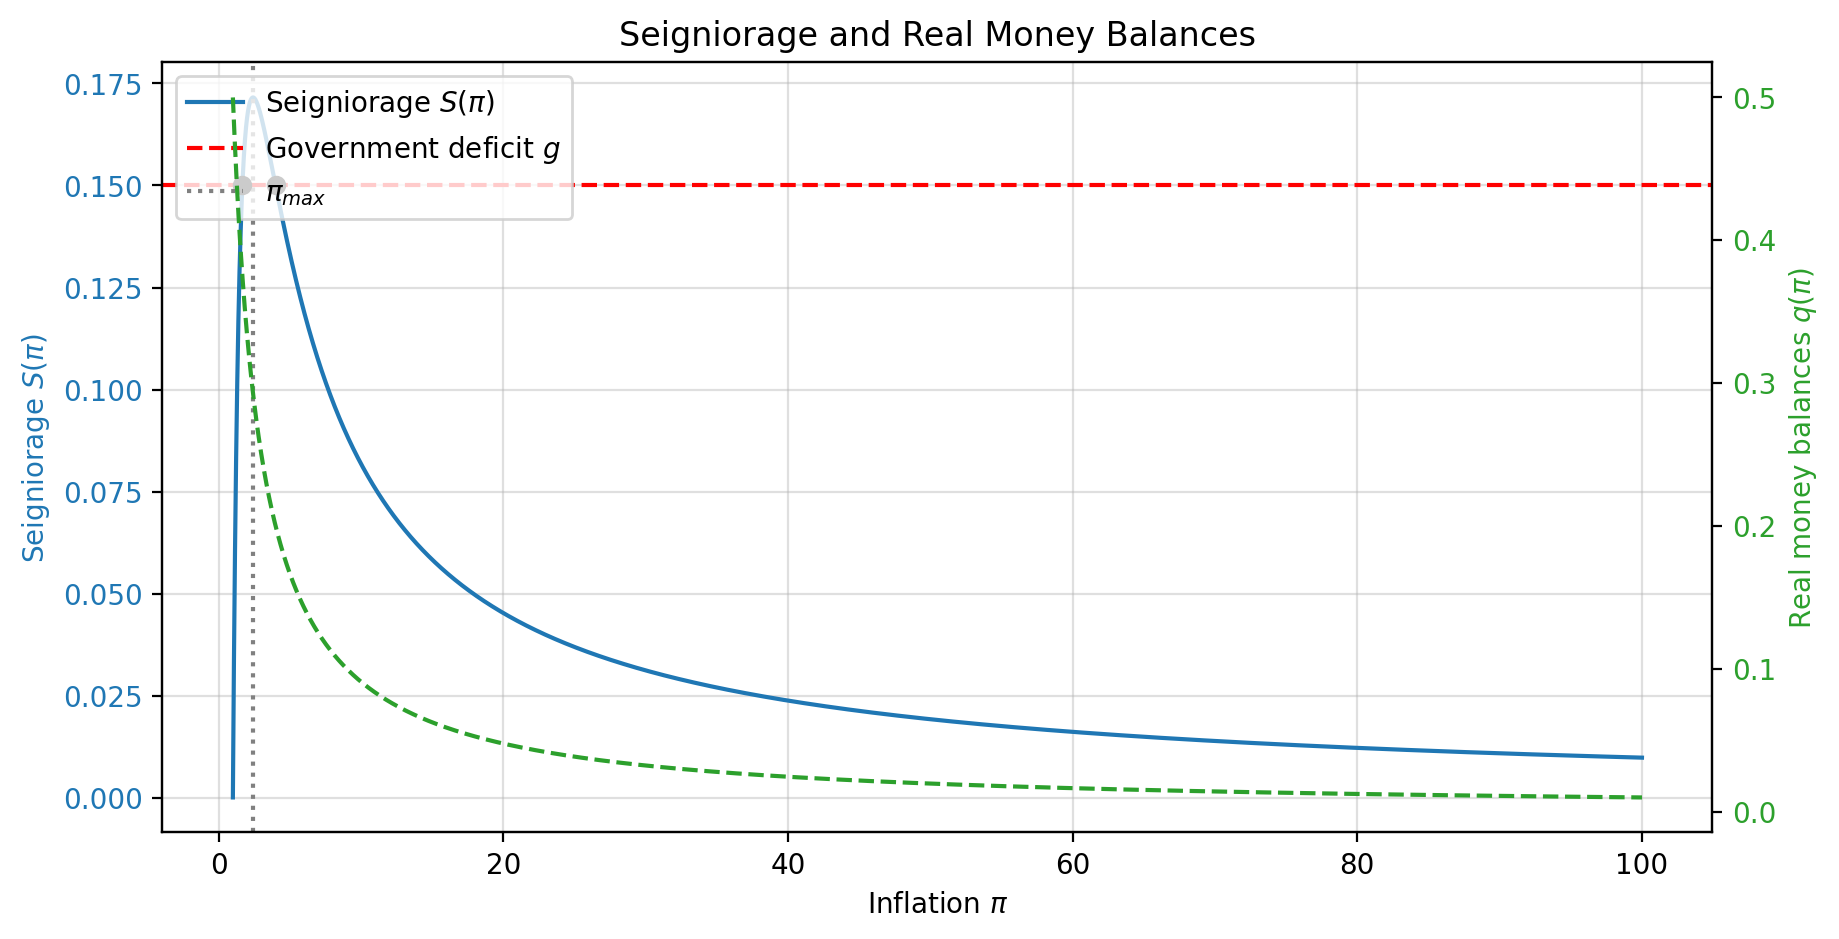

Seigniorage-max inflation: pi_max = 2.4159, S(pi_max) = 0.1716
Steady-state 1: pi = 1.6667, S(pi) = 0.1500, q(pi) = 0.3750
Steady-state 2: pi = 4.0000, S(pi) = 0.1500, q(pi) = 0.2000


'\n    # Simulate transitional dynamics from a low inflation starting point\n    pi_path_low, q_path_low = simulate_dynamics(model, pi0=1.2, T=40)\n    plot_dynamics(pi_path_low, q_path_low, model)\n\n    # Simulate transitional dynamics from a medium inflation starting point\n    pi_path_low, q_path_low = simulate_dynamics(model, pi0=2, T=40)\n    plot_dynamics(pi_path_low, q_path_low, model)\n\n    # Simulate from a higher inflation starting point\n    pi_path_high, q_path_high = simulate_dynamics(model, pi0=5.0, T=40)\n    plot_dynamics(pi_path_high, q_path_high, model)\n'

In [2]:
# CRRA-based seigniorage analysis with dynamics and dual-axis plot
import numpy as np
import matplotlib.pyplot as plt
from collections import namedtuple
from scipy.optimize import brentq

plt.rcParams['figure.dpi'] = 200

# -------------------------
# Parameters container
# -------------------------
CRRAModel = namedtuple("CRRAModel", ["y", "eta", "g", "pi_min", "pi_max", "grid_N"])

def create_model(y=1.0, eta=0.5, g=0.15, pi_min=1.0001, pi_max=50.0, grid_N=20000):
    if not (eta < 1):
        raise ValueError("Model requires eta < 1 (per your specification).")
    return CRRAModel(y=y, eta=eta, g=g, pi_min=pi_min, pi_max=pi_max, grid_N=grid_N)


# -------------------------
# Core model functions
# -------------------------
def q_of_pi(pi, model):
    """Real money demand q(pi) = y / (1 + pi^{(1-eta)/eta})."""
    exponent = (1.0 - model.eta) / model.eta
    return model.y / (1.0 + np.power(pi, exponent))

def seign_of_pi(pi, model):
    """Seigniorage as function of inflation pi: S(pi) = q(pi)*(1 - 1/pi)."""
    return q_of_pi(pi, model) * (1.0 - 1.0 / pi)


# -------------------------
# Steady states and plot
# -------------------------
def analyze_model(model, plot=True):
    pi_grid = np.linspace(model.pi_min, model.pi_max, model.grid_N)
    S_grid = seign_of_pi(pi_grid, model)
    q_grid = q_of_pi(pi_grid, model)

    # Seigniorage max
    idx_max = np.nanargmax(S_grid)
    pi_max = pi_grid[idx_max]
    S_max = S_grid[idx_max]

    # Steady-state inflation values (roots)
    roots = []
    for i in range(len(pi_grid) - 1):
        if (S_grid[i] - model.g) * (S_grid[i + 1] - model.g) < 0:
            root = brentq(lambda x: seign_of_pi(x, model) - model.g, pi_grid[i], pi_grid[i + 1])
            roots.append(root)

    # --- Plot dual-axis figure ---
    if plot:
        fig, ax1 = plt.subplots(figsize=(10, 5))
        color1 = "tab:blue"
        ax1.set_xlabel(r"Inflation $\pi$")
        ax1.set_ylabel(r"Seigniorage $S(\pi)$", color=color1)
        ax1.plot(pi_grid, S_grid, color=color1, label=r"Seigniorage $S(\pi)$")
        ax1.axhline(y=model.g, color="red", linestyle="--", label=r"Government deficit $g$")
        ax1.axvline(x=pi_max, color="gray", linestyle=":", label=r"$\pi_{max}$")
        for r in roots:
            ax1.scatter(r, seign_of_pi(r, model), color="black", zorder=5)
        ax1.tick_params(axis="y", labelcolor=color1)
        ax1.legend(loc="upper left")
        ax1.grid(alpha=0.4)

        # Second axis for q(pi)
        ax2 = ax1.twinx()
        color2 = "tab:green"
        ax2.set_ylabel(r"Real money balances $q(\pi)$", color=color2)
        ax2.plot(pi_grid, q_grid, color=color2, linestyle="--", label=r"$q(\pi)$")
        ax2.tick_params(axis="y", labelcolor=color2)
        plt.title("Seigniorage and Real Money Balances")
        plt.show()

    # Summary print
    print(f"Seigniorage-max inflation: pi_max = {pi_max:.4f}, S(pi_max) = {S_max:.4f}")
    for j, r in enumerate(roots):
        print(f"Steady-state {j+1}: pi = {r:.4f}, S(pi) = {seign_of_pi(r, model):.4f}, q(pi) = {q_of_pi(r, model):.4f}")

    return {"pi_grid": pi_grid, "S_grid": S_grid, "q_grid": q_grid,
            "pi_max": pi_max, "S_max": S_max, "roots": roots}


# -------------------------
# Transitional dynamics simulation
# -------------------------
def simulate_dynamics(model, pi0=1.2, T=50, verbose=False):
    """
    Simulate transition using the law of motion:
        g = q_{t+1} - q_t / pi_{t+1},
    with q_t = y / (1 + pi_t^{(1-eta)/eta}).
    Solve for pi_{t+1} each period.
    """
    pi_path = np.empty(T)
    q_path = np.empty(T)
    pi_path[0] = pi0
    q_path[0] = q_of_pi(pi0, model)

    for t in range(T - 1):
        q_t = q_path[t]

        # Define function for pi_{t+1} implied by government budget constraint
        def f(pi_next):
            q_next = q_of_pi(pi_next, model)
            return model.g - (q_next - q_t / pi_next)

        # Search over a wide range to find consistent next-period inflation
        try:
            pi_next = brentq(f, 1.0001, model.pi_max)
        except ValueError:
            pi_next = np.nan  # no solution
        pi_path[t + 1] = pi_next
        q_path[t + 1] = q_of_pi(pi_next, model)
        if verbose:
            print(f"t={t}, pi_t={pi_path[t]:.3f}, pi_{t+1}={pi_next:.3f}")

    return pi_path, q_path


def plot_dynamics(pi_path, q_path, model):
    T = len(pi_path)
    fig, ax1 = plt.subplots(figsize=(10, 5))
    ax1.plot(range(T), pi_path, color="tab:red", label="Inflation path π_t")
    ax1.set_xlabel("Time")
    ax1.set_ylabel("Inflation π_t", color="tab:red")
    ax1.tick_params(axis="y", labelcolor="tab:red")
    ax1.grid(alpha=0.3)

    ax2 = ax1.twinx()
    ax2.plot(range(T), q_path, color="tab:blue", linestyle="--", label="Real balances q_t")
    ax2.set_ylabel("Real money balances q_t", color="tab:blue")
    ax2.tick_params(axis="y", labelcolor="tab:blue")

    plt.title("Transitional Dynamics: Inflation and Real Balances")
    fig.tight_layout()
    plt.show()


# -------------------------
# Run everything
# -------------------------
if __name__ == "__main__":
    model = create_model(y=1.0, eta=0.5, g=0.15, pi_max=100.0)
    results = analyze_model(model, plot=True)
"""
    # Simulate transitional dynamics from a low inflation starting point
    pi_path_low, q_path_low = simulate_dynamics(model, pi0=1.2, T=40)
    plot_dynamics(pi_path_low, q_path_low, model)

    # Simulate transitional dynamics from a medium inflation starting point
    pi_path_low, q_path_low = simulate_dynamics(model, pi0=2, T=40)
    plot_dynamics(pi_path_low, q_path_low, model)

    # Simulate from a higher inflation starting point
    pi_path_high, q_path_high = simulate_dynamics(model, pi0=5.0, T=40)
    plot_dynamics(pi_path_high, q_path_high, model)
"""

Since we have multiple equilibria, one root will typically be locally stable and the other unstable.  Consider the mapping from current inflation to future inflation $\pi_{t+1}=G(\pi_t)$.  A steady state $\pi$ is locally stable if and only if $|G'(\pi)|<1$ and unstable if and only if $|G'(\pi)|>1$. The mapping $F$ is implicitly defined by our equilibrium equation

$$
0=H(\pi_{t+1},\pi_t)= q_{t}(\pi_{t+1})-\frac{q_{t-1}}{\pi_{t}}-g
$$

which by implicit differentiation we can write

$$
\frac{\partial \pi_{t+1}}{\partial \pi_t}=\frac{q_{t-1}'(\pi_t)\pi_t-p_{t-1}(\pi_t)}{\pi_t^2 q_t'(\pi_{t+1})}
$$

Now looking at a steady state $\pi_{t+1}=\pi_t=\pi$ we have that

$$
\begin{align*}
G'(\pi)&=\frac{q'(\pi)\pi-q(\pi)}{\pi^2 q'(\pi)} \\
&=\frac{1}{\pi}\left( 1-\frac{1}{\epsilon_{q,\pi}}\right)
\end{align*}
$$

where $\epsilon_{q,\pi} \equiv \frac{\partial q}{\partial \pi}\frac{\pi}{q}$ is the elasticity of real money demand with respect to inflation.  Applying our specific functional form for real money demand gives an elasticity of  $\epsilon_{q,\pi}=-\pi/(1+\pi)$ so that

$$
G'(\pi)=\frac{2 \pi+1}{\pi^2}
$$

We can test stability at each steady state we numerically computed and confirm that

$$
|G'(1.667)|=1.56>1 \quad \text{and} \quad |G'(4)|=0.5625<1
$$

so that the low inflation equilibrium is unstable and the high inflation equilibrium is stable.  We illustrate this numerically by plotting transition paths for inflation $\pi_t$ and real money balances $q_t$ and observe that beginning from initial condition $\pi_0=5$ the economy converges to the high inflation steady state with $\pi=4$ and $q=0.20$.

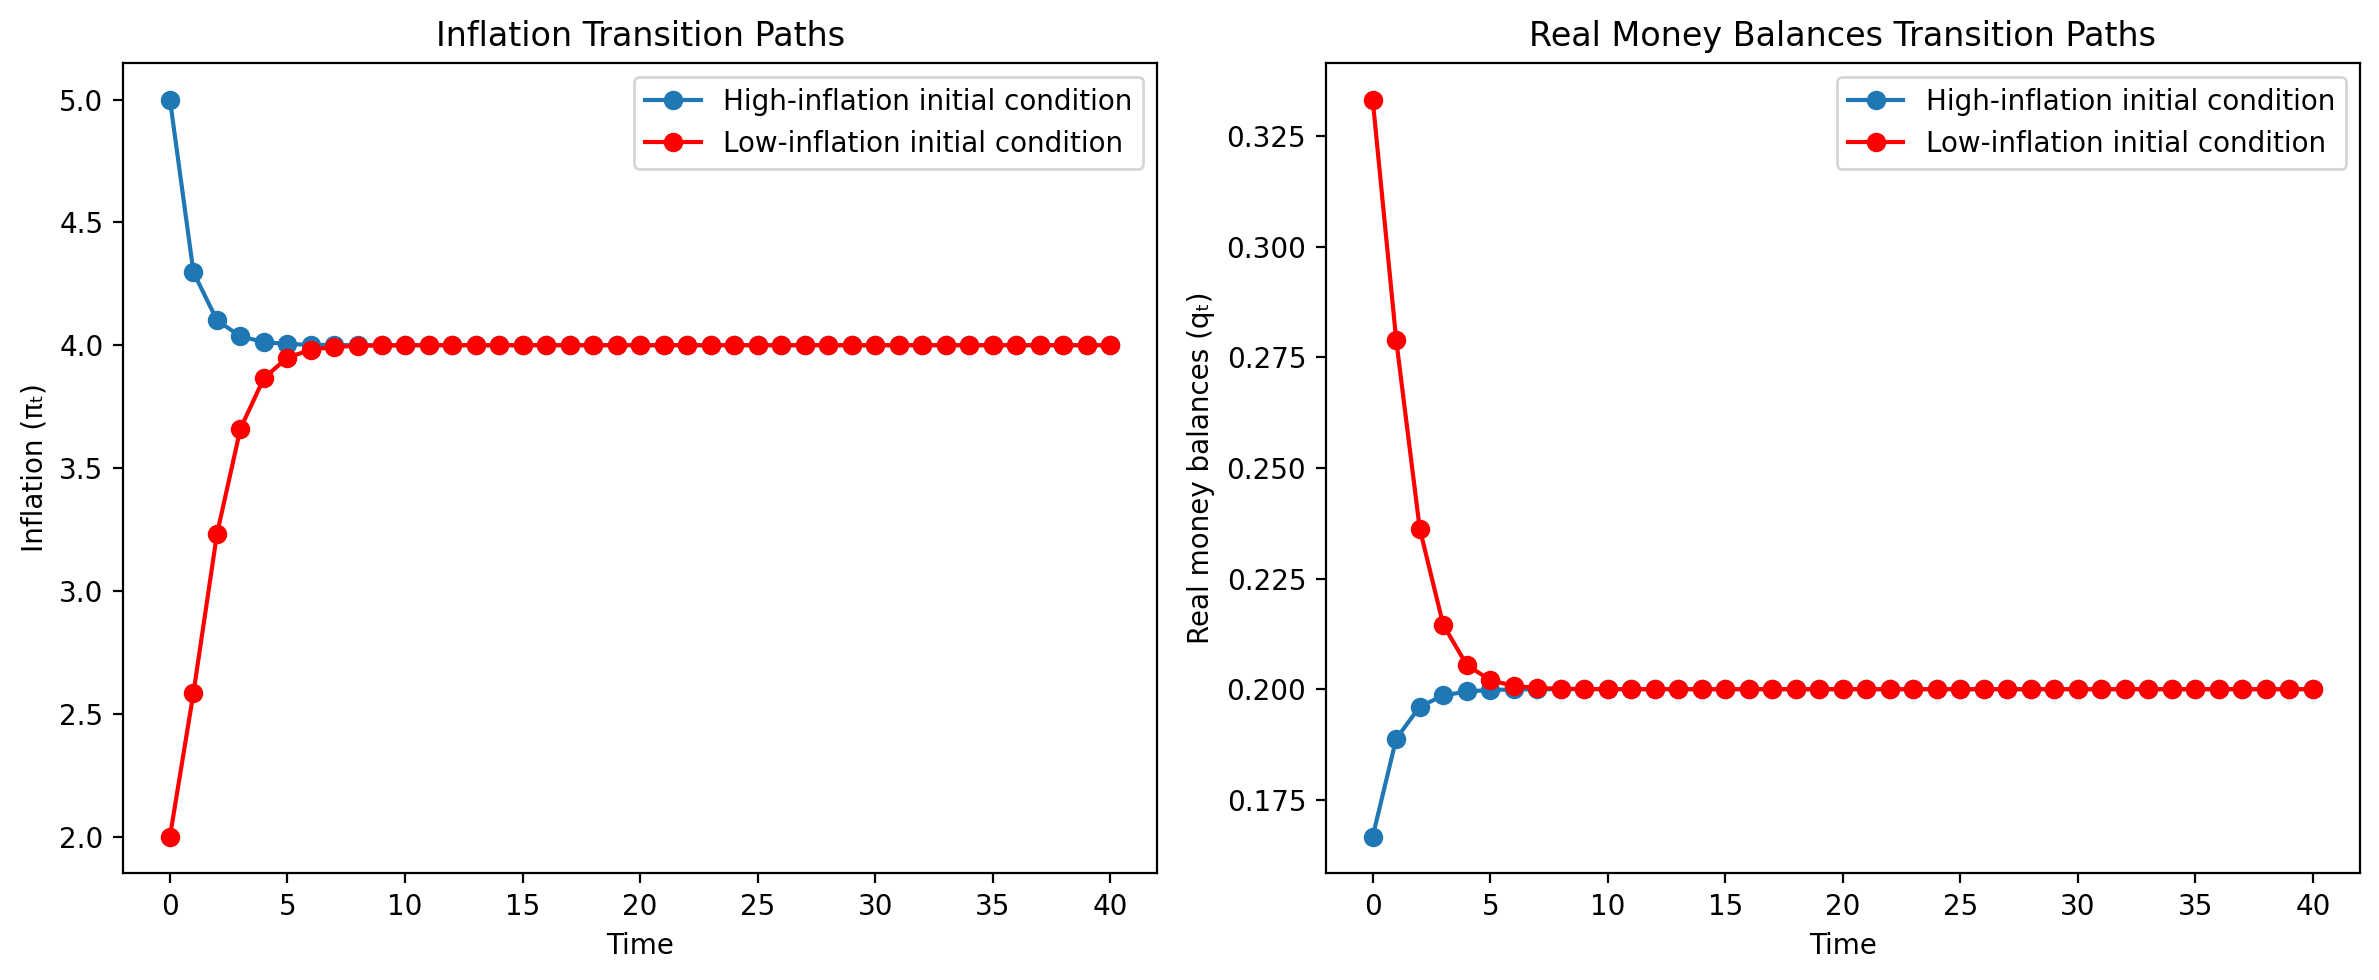

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# === parameters ===
y = 1.0
eta = 0.5
g = 0.15
T = 40

def q(pi, y, eta):
    a = (1 - eta) / eta
    return y / (1 + pi**a)

def F(pi_next, pi_t, y, eta, g):
    return q(pi_next, y, eta) - q(pi_t, y, eta)/pi_next - g

def solve_next_pi(pi_t, y, eta, g, lo=1.0001, hi=1000.0, tol=1e-8):
    """Try to find root of F(pi_next, pi_t) = 0 by bisection.
       Returns np.nan if no sign change."""
    f_lo, f_hi = F(lo, pi_t, y, eta, g), F(hi, pi_t, y, eta, g)
    if np.isnan(f_lo) or np.isnan(f_hi) or f_lo * f_hi > 0:
        return np.nan
    for _ in range(200):
        mid = 0.5*(lo+hi)
        f_mid = F(mid, pi_t, y, eta, g)
        if abs(f_mid) < tol:
            return mid
        if f_lo * f_mid < 0:
            hi, f_hi = mid, f_mid
        else:
            lo, f_lo = mid, f_mid
    return np.nan

def simulate_path(pi0, y, eta, g, T):
    """Simulate inflation and money balances, even when unstable."""
    pi_path = [pi0]
    q_path = [q(pi0, y, eta)]
    for t in range(T):
        pi_t = pi_path[-1]
        pi_next = solve_next_pi(pi_t, y, eta, g)
        
        # if no valid next inflation, extend heuristically
        if np.isnan(pi_next):
            f_test = F(pi_t*1.01, pi_t, y, eta, g)
            # if F>0, inflation must rise; if F<0, inflation must fall
            direction = 1 if f_test > 0 else -1
            pi_next = pi_t * (1 + 0.1 * direction)
        
        # cap extreme values
        if pi_next < 0.5:
            pi_next = 0.5
        if pi_next > 1e3:
            break
        
        pi_path.append(pi_next)
        q_path.append(q(pi_next, y, eta))
    return np.array(pi_path), np.array(q_path)

# === Simulations ===
pi0_low = 1.2
pi0_medium = 2
pi0_high = 5.0

pi_path_low, q_path_low = simulate_path(pi0_low, y, eta, g, T)
pi_path_medium, q_path_medium = simulate_path(pi0_medium, y, eta, g, T)
pi_path_high, q_path_high = simulate_path(pi0_high, y, eta, g, T)

# === Plot ===
fig, ax = plt.subplots(1, 2, figsize=(12,5))

# inflation path
ax[0].plot(pi_path_high, '-o', label='High-inflation initial condition')
ax[0].plot(pi_path_medium, '-o', label='Low-inflation initial condition', color='red')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Inflation (πₜ)')
ax[0].legend()
ax[0].set_title('Inflation Transition Paths')

# money balances
ax[1].plot(q_path_high, '-o', label='High-inflation initial condition')
ax[1].plot(q_path_medium, '-o', label='Low-inflation initial condition', color='red')
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Real money balances (qₜ)')
ax[1].legend()
ax[1].set_title('Real Money Balances Transition Paths')

plt.tight_layout()
plt.show()


Finally, we plot the transition path with an initial condition $\pi_0<\pi_l=1.667$.  Recall that the low inflation steady state is unstable, so an initial condition just under $\pi_l$ will result in explosive dynamics.  Money loses its value rapidly causing inflation to shoot up $\pi \rightarrow \infty$.  As a consequence real money demand collapses almost immediately.  

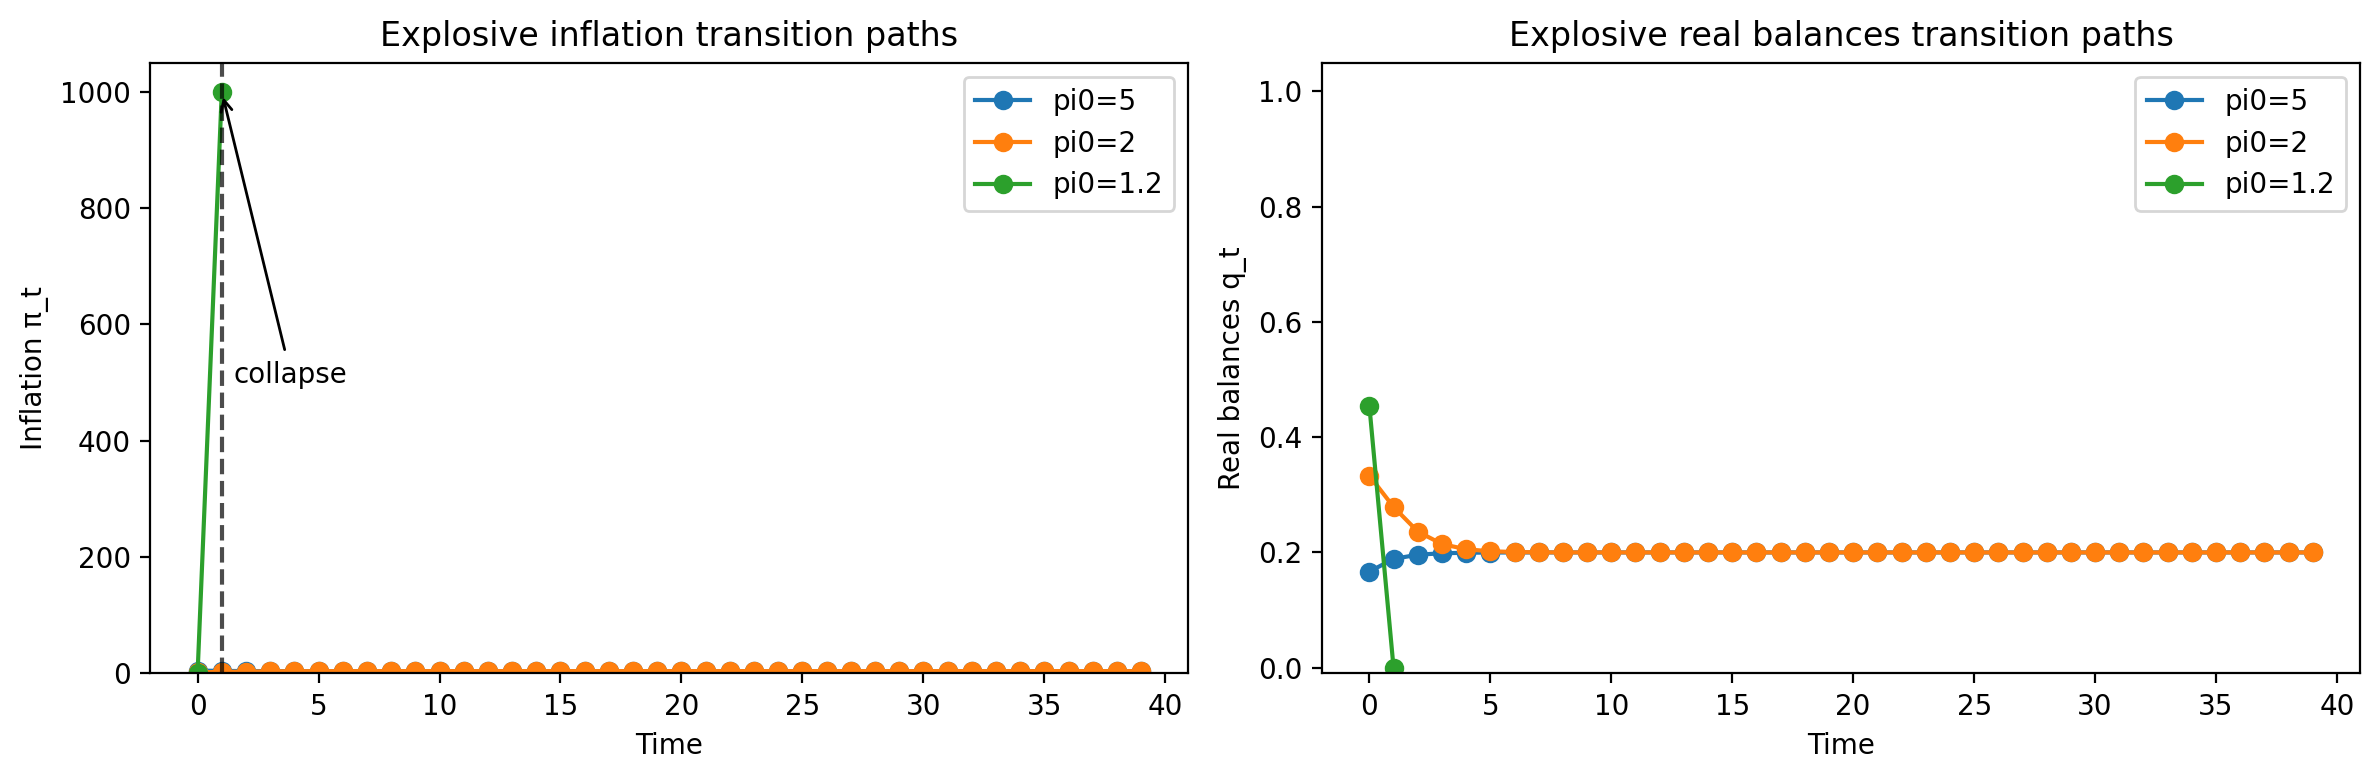

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import brentq

# ---- Model primitives ----
y = 1.0
eta = 0.5
g = 0.15

def q_of_pi(pi):
    a = (1.0 - eta) / eta
    return y / (1.0 + pi**a)

def F(pi_next, pi_t):
    return q_of_pi(pi_next) - q_of_pi(pi_t) / pi_next - g

# ---- Robust solver + simulate ----
def find_pi_next(pi_t, pi_lo=1.0001, pi_hi=1e6):
    """
    Try to find finite root on [pi_lo, pi_hi_bracket].
    If there's no sign change on a reasonable bracket, return np.inf to indicate collapse (pi -> large).
    """
    # bracket for root-finding (avoid starting at exactly 1)
    lo = pi_lo
    hi = min(pi_hi, 1e6)

    f_lo = F(lo, pi_t)
    f_hi = F(hi, pi_t)

    # If sign change, use brentq to get root
    if not (np.isnan(f_lo) or np.isnan(f_hi)) and f_lo * f_hi <= 0:
        try:
            root = brentq(lambda x: F(x, pi_t), lo, hi, maxiter=200)
            return root
        except Exception:
            return np.inf
    # No sign change on [lo,hi] -> interpret as collapse (pi -> very large)
    return np.inf


def simulate(pi0, T=40, pi_max_plot=1e3, collapse_value=1e3):
    """
    Simulate up to T periods. When find_pi_next returns np.inf (no finite root),
    we record collapse_value for plotting and set q approx 0 thereafter.
    We stop the simulation if pi exceeds a safety threshold.
    """
    pi_path = []
    q_path = []
    collapse_times = []

    pi = pi0
    pi_path.append(pi)
    q_path.append(q_of_pi(pi))

    for t in range(T - 1):
        pi_next = find_pi_next(pi_t=pi, pi_lo=1.0001, pi_hi=1e6)

        if np.isinf(pi_next):
            # collapse: mark and record big finite value for plotting
            pi_next_plot = collapse_value
            q_next = 0.0
            collapse_times.append(t + 1)
            pi_path.append(pi_next_plot)
            q_path.append(q_next)
            # After collapse, money demand ~ 0. Stop or continue recording zeros
            # We'll stop to avoid meaningless further iteration.
            break
        else:
            # Found a finite root -> continue normally
            pi_path.append(pi_next)
            q_path.append(q_of_pi(pi_next))
            # safety stop if pi_next is huge
            if pi_next > pi_max_plot:
                collapse_times.append(t + 1)
                break
            pi = pi_next

    return np.array(pi_path), np.array(q_path), collapse_times

# ---- Example runs ----
pi0_low = 1.2   # below unstable root
pi0_mid = 2   # maybe slightly above unstable root depending on params
pi0_high = 5 # leads to high-inflation attractor

pi_path_low, q_path_low, col_low = simulate(pi0_low, T=40, collapse_value=1e3)
pi_path_mid, q_path_mid, col_mid = simulate(pi0_mid, T=40, collapse_value=1e3)
pi_path_high, q_path_high, col_high = simulate(pi0_high, T=40, collapse_value=1e3)

# ---- Plotting ----
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Inflation paths
axs[0].plot(pi_path_high, '-o', label=f'pi0={pi0_high}')
axs[0].plot(pi_path_mid, '-o', label=f'pi0={pi0_mid}')
axs[0].plot(pi_path_low, '-o', label=f'pi0={pi0_low}')
# mark collapse times if any
if col_low:
    axs[0].axvline(col_low[0], color='k', linestyle='--', alpha=0.7)
    axs[0].annotate('collapse', xy=(col_low[0], pi_path_low[min(col_low[0], len(pi_path_low)-1)]),
                    xytext=(col_low[0]+0.5, pi_path_low[min(col_low[0], len(pi_path_low)-1)]/2),
                    arrowprops=dict(arrowstyle='->'))
axs[0].set_ylim(0, 1.05 * 1e3)  # to show collapse marker (adjust as needed)
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Inflation π_t')
axs[0].set_title('Explosive inflation transition paths')
axs[0].legend()

# q paths
axs[1].plot(q_path_high, '-o', label=f'pi0={pi0_high}')
axs[1].plot(q_path_mid, '-o', label=f'pi0={pi0_mid}')
axs[1].plot(q_path_low, '-o', label=f'pi0={pi0_low}')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Real balances q_t')
axs[1].set_title('Explosive real balances transition paths')
axs[1].legend()
axs[1].set_ylim(-0.01, 1.05 * y)  # show q ~ 0 on collapse

plt.tight_layout()
plt.show()
